In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [26]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [27]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [28]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2c712c97553a3b93490ce4a9697ca3e3


In [29]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [30]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [31]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval         ")
print("---------------------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval         
---------------------------------------


In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval         ")
print("---------------------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval         
---------------------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | cockburn town
Processing Record 3 of Set 1 | aksu
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | novokizhinginsk
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | atocha
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | mantua
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | cayenne
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | temaraia
City not found. Skipping...
Processing Record 21 o

Processing Record 43 of Set 4 | kudahuvadhoo
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | serenje
Processing Record 46 of Set 4 | kaspiyskiy
Processing Record 47 of Set 4 | asyut
Processing Record 48 of Set 4 | arlit
Processing Record 49 of Set 4 | tetiz
Processing Record 50 of Set 4 | jalor
Processing Record 1 of Set 5 | aklavik
Processing Record 2 of Set 5 | balkhash
Processing Record 3 of Set 5 | la ronge
Processing Record 4 of Set 5 | bilibino
Processing Record 5 of Set 5 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 6 of Set 5 | laguna
Processing Record 7 of Set 5 | kapit
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 5 | omutninsk
Processing Record 10 of Set 5 | amderma
City not found. Skipping...
Processing Record 11 of Set 5 | shar
Processing Record 12 of Set 5 | chokurdakh
Processing Record 13 of Set 5 | westport
Processing Record 14 of Set 5 | port blair
Processing Record 15 of

Processing Record 31 of Set 8 | khandbari
Processing Record 32 of Set 8 | viedma
Processing Record 33 of Set 8 | presidencia roque saenz pena
Processing Record 34 of Set 8 | paamiut
Processing Record 35 of Set 8 | harlingen
Processing Record 36 of Set 8 | srednekolymsk
Processing Record 37 of Set 8 | lasa
Processing Record 38 of Set 8 | sept-iles
Processing Record 39 of Set 8 | yatou
Processing Record 40 of Set 8 | witham
Processing Record 41 of Set 8 | contamana
Processing Record 42 of Set 8 | flin flon
Processing Record 43 of Set 8 | chepareria
Processing Record 44 of Set 8 | isangel
Processing Record 45 of Set 8 | atlantic city
Processing Record 46 of Set 8 | zaraza
Processing Record 47 of Set 8 | morecambe
Processing Record 48 of Set 8 | kavaratti
Processing Record 49 of Set 8 | amargosa
Processing Record 50 of Set 8 | raga
Processing Record 1 of Set 9 | wajima
Processing Record 2 of Set 9 | tecoanapa
Processing Record 3 of Set 9 | madzhalis
Processing Record 4 of Set 9 | celestun


Processing Record 13 of Set 12 | goregaon
Processing Record 14 of Set 12 | inongo
Processing Record 15 of Set 12 | cabedelo
Processing Record 16 of Set 12 | puerto penasco
Processing Record 17 of Set 12 | baghdad
Processing Record 18 of Set 12 | el real de santa maria
Processing Record 19 of Set 12 | sibolga
Processing Record 20 of Set 12 | kungurtug
Processing Record 21 of Set 12 | kasongo-lunda
Processing Record 22 of Set 12 | balabac
Processing Record 23 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 24 of Set 12 | sao gabriel
Processing Record 25 of Set 12 | uglekamensk
Processing Record 26 of Set 12 | ginda
Processing Record 27 of Set 12 | pochutla
Processing Record 28 of Set 12 | basco
Processing Record 29 of Set 12 | ust-omchug
Processing Record 30 of Set 12 | kutum
Processing Record 31 of Set 12 | comodoro rivadavia
Processing Record 32 of Set 12 | constantine
Processing Record 33 of Set 12 | puerto madero
Processing Record 34 of Set 12 | fare


In [34]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,74.19,96,100,11.61,BR,2022-01-30 01:48:10
1,Cockburn Town,21.4612,-71.1419,76.96,73,40,11.50,TC,2022-01-30 01:45:24
2,Aksu,41.1231,80.2644,23.88,51,87,5.03,CN,2022-01-30 01:48:17
3,East London,-33.0153,27.9116,68.97,85,9,5.82,ZA,2022-01-30 01:48:18
4,Novokizhinginsk,51.6115,109.5917,-8.55,96,97,2.44,RU,2022-01-30 01:48:19
5,Thompson,55.7435,-97.8558,-12.84,77,20,0.00,CA,2022-01-30 01:48:19
6,Atocha,-20.9333,-66.2333,49.51,83,99,6.58,BO,2022-01-30 01:48:19
7,Port Elizabeth,-33.9180,25.5701,66.49,88,0,6.91,ZA,2022-01-30 01:48:20
8,Carnarvon,-24.8667,113.6333,80.67,78,75,13.80,AU,2022-01-30 01:48:20
9,Rikitea,-23.1203,-134.9692,76.91,70,100,7.83,PF,2022-01-30 01:48:21


In [35]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

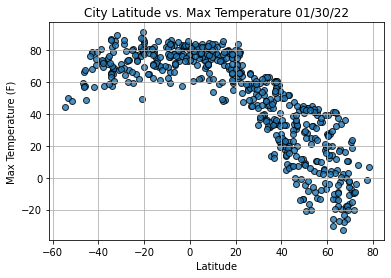

In [45]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

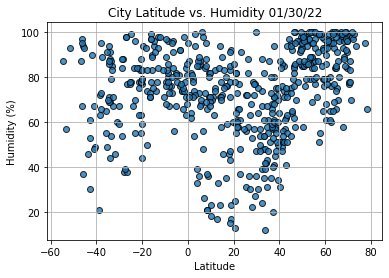

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

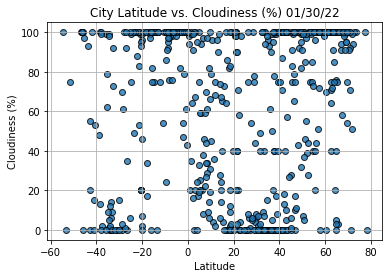

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

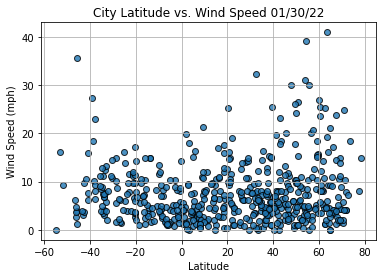

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [52]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
index13 = city_data_df.loc[13]
index13

City                   Nikolskoye
Lat                       59.7035
Lng                       30.7861
Max Temp                    27.72
Humidity                       93
Cloudiness                    100
Wind Speed                  15.82
Country                        RU
Date          2022-01-30 01:48:22
Name: 13, dtype: object

In [54]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
545     True
546     True
547     True
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [55]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Cockburn Town,21.4612,-71.1419,76.96,73,40,11.50,TC,2022-01-30 01:45:24
2,Aksu,41.1231,80.2644,23.88,51,87,5.03,CN,2022-01-30 01:48:17
4,Novokizhinginsk,51.6115,109.5917,-8.55,96,97,2.44,RU,2022-01-30 01:48:19
5,Thompson,55.7435,-97.8558,-12.84,77,20,0.00,CA,2022-01-30 01:48:19
10,Mantua,45.1667,10.7833,38.71,95,28,1.99,IT,2022-01-30 01:48:21
...,...,...,...,...,...,...,...,...,...
545,Thinadhoo,0.5333,72.9333,81.28,71,94,4.09,MV,2022-01-30 02:04:50
546,San Cristobal,7.7669,-72.2250,71.78,85,44,3.33,VE,2022-01-30 02:04:51
547,Tamworth,52.6340,-1.6959,42.58,86,28,1.99,GB,2022-01-30 02:04:51
548,Lepaterique,14.0667,-87.4667,60.40,94,28,7.78,HN,2022-01-30 02:05:51


In [56]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Cockburn Town,21.4612,-71.1419,76.96,73,40,11.50,TC,2022-01-30 01:45:24
2,Aksu,41.1231,80.2644,23.88,51,87,5.03,CN,2022-01-30 01:48:17
4,Novokizhinginsk,51.6115,109.5917,-8.55,96,97,2.44,RU,2022-01-30 01:48:19
5,Thompson,55.7435,-97.8558,-12.84,77,20,0.00,CA,2022-01-30 01:48:19
10,Mantua,45.1667,10.7833,38.71,95,28,1.99,IT,2022-01-30 01:48:21


In [57]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

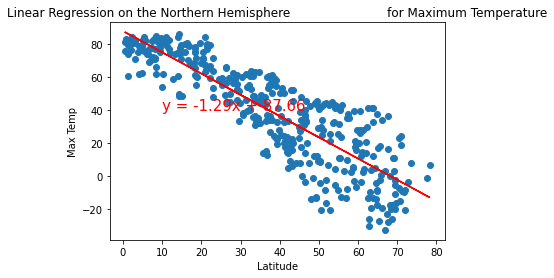

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

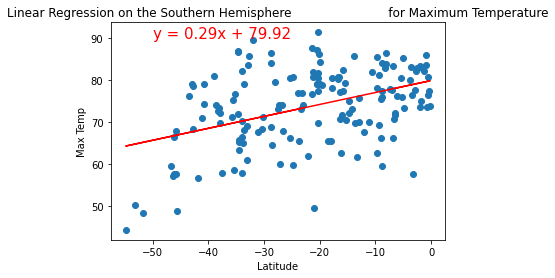

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


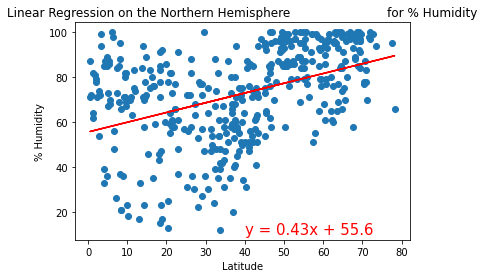

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

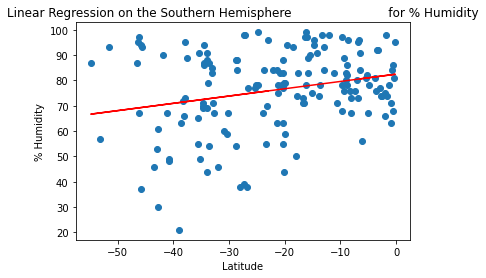

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

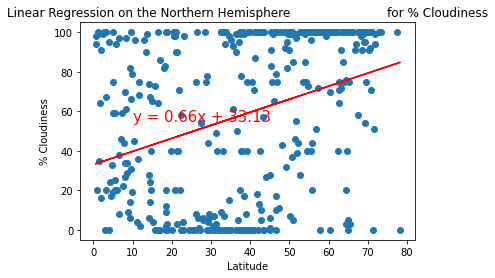

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

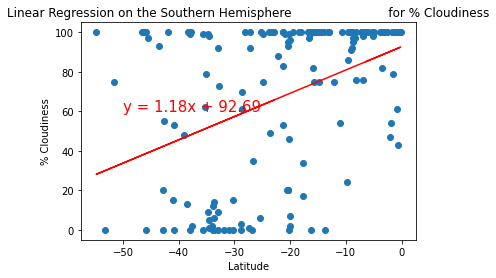

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

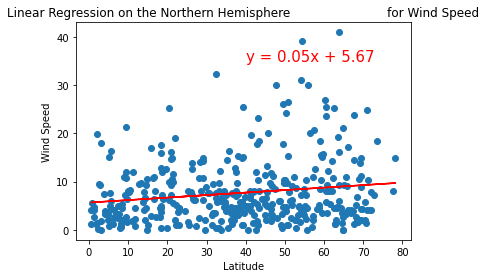

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

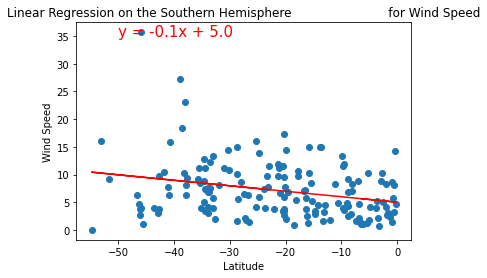

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))